In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict
import os
from sklearn import svm
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle


# Load CSV

In [10]:
X_train = pd.read_csv('./models_training_csv/train_minmax_pca.csv')
X_train = shuffle(X_train)
y_train = X_train.iloc[:,-1]
X_test = pd.read_csv('./models_training_csv/test_minmax_pca.csv')
y_test = X_test.iloc[:,-1]


----------
# Knn

In [11]:
accuray_man = {}
accuray_uw = {}
accuray_man_u = {}
accuray_uu = {}

kVals = np.arange(1,100,1)
for k in kVals:

    # Manhattan Weighted Knn
    model = KNeighborsClassifier(n_neighbors=k,weights = 'distance', p = 1)
    model.fit(X_train, y_train.values.ravel()) 
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    accuray_man[k] = round(score*100,2)
 
    # Euclidean Weighted Knn
    model1 = KNeighborsClassifier(n_neighbors=k,weights = 'distance', p = 2)
    model1.fit(X_train, y_train.values.ravel()) 
    y_pred1 = model1.predict(X_test)
    score1 = accuracy_score(y_test,y_pred1)
    accuray_uw[k] = round(score1*100,2)
    # 10 Fold CV
 
    # Manhattan Uniform Knn
    model2 = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 1)
    model2.fit(X_train, y_train.values.ravel())
    y_pred2 = model2.predict(X_test)
    score2 = accuracy_score(y_test,y_pred2)
    accuray_man_u[k] = round(score2*100,2)

    # Euclidean Uniform Knn
    model3 = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2)
    model3.fit(X_train, y_train.values.ravel())
    y_pred3 = model3.predict(X_test)
    score3 = accuracy_score(y_test,y_pred3)
    accuray_uu[k] = round(score3*100,2)
    


max_value = max(accuray_man, key=accuray_man.get)
print('Weighted KNN: Manhattan, Best k =',max_value,' Accuracy:' ,accuray_man[max_value])
max_value = max(accuray_uw, key=accuray_uw.get)
print('Weighted KNN: Euclidean, Best k =',max_value,' Accuracy:' ,accuray_uw[max_value])
max_value = max(accuray_man_u, key=accuray_man_u.get)
print('Uniform KNN: Manhattan, Best k =',max_value,' Accuracy:' ,accuray_man_u[max_value])
max_value = max(accuray_uu, key=accuray_uu.get)
print('Uniform KNN: Euclidean, Best k =',max_value,' Accuracy:' ,accuray_uu[max_value])

Weighted KNN: Manhattan, Best k = 12  Accuracy: 76.51
Weighted KNN: Euclidean, Best k = 1  Accuracy: 38.55
Uniform KNN: Manhattan, Best k = 13  Accuracy: 74.7
Uniform KNN: Euclidean, Best k = 1  Accuracy: 38.55


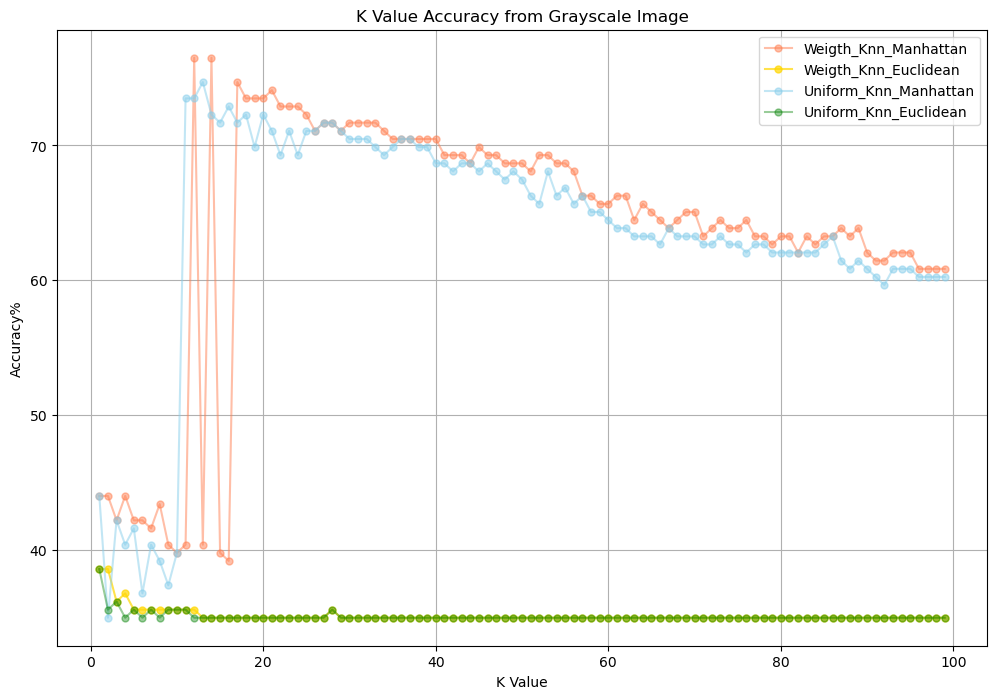

In [12]:

# Plot
names = list(accuray_man.keys())
values = list(accuray_man.values())
names2 = list(accuray_uw.keys())
values2 = list(accuray_uw.values())
names3 = list(accuray_man_u.keys())
values3 = list(accuray_man_u.values())
names4 = list(accuray_uu.keys())
values4 = list(accuray_uu.values())

x_val = range(1,100)
plt.subplots(figsize=(12,8))
plt.plot(x_val, values, color='coral', marker='o', markerfacecolor='coral', markersize=5, label='Weigth_Knn_Manhattan', alpha=0.5)
plt.plot(x_val, values2, color='gold', marker='o',markerfacecolor='gold', markersize=5, label="Weigth_Knn_Euclidean",alpha=0.7)
plt.plot(x_val, values3, color='skyblue', marker='o',markerfacecolor='skyblue', markersize=5, label="Uniform_Knn_Manhattan",alpha=0.5)
plt.plot(x_val, values4, color='green', marker='o',markerfacecolor='green', markersize=5, label="Uniform_Knn_Euclidean",alpha=0.4)
plt.grid()
plt.title('K Value Accuracy from Grayscale Image')
plt.xlabel('K Value')
plt.ylabel('Accuracy%')
plt.legend()

In [15]:
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
param_grid = {'n_neighbors':list(range(1,50)) , 'weights': ['uniform','distance'] , 'p':[1,2]}
grid = GridSearchCV(model, param_grid, scoring = 'accuracy', refit=True, verbose = 3, return_train_score = True)
grid.fit(X_train, y_train.values.ravel())
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5] END n_neighbors=1, p=1, weights=uniform;, score=(train=1.000, test=0.800) total time=   0.1s
[CV 2/5] END n_neighbors=1, p=1, weights=uniform;, score=(train=1.000, test=0.804) total time=   0.1s
[CV 3/5] END n_neighbors=1, p=1, weights=uniform;, score=(train=1.000, test=0.804) total time=   0.1s
[CV 4/5] END n_neighbors=1, p=1, weights=uniform;, score=(train=1.000, test=0.810) total time=   0.1s
[CV 5/5] END n_neighbors=1, p=1, weights=uniform;, score=(train=1.000, test=0.787) total time=   0.1s
[CV 1/5] END n_neighbors=1, p=1, weights=distance;, score=(train=1.000, test=0.800) total time=   0.1s
[CV 2/5] END n_neighbors=1, p=1, weights=distance;, score=(train=1.000, test=0.804) total time=   0.1s
[CV 3/5] END n_neighbors=1, p=1, weights=distance;, score=(train=1.000, test=0.804) total time=   0.1s
[CV 4/5] END n_neighbors=1, p=1, weights=distance;, score=(train=1.000, test=0.810) total time=   0.1s
[CV 5/5] END n_

In [28]:
result = pd.DataFrame(grid.cv_results_)#[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
73,0.002843,0.000079,0.077083,0.003554,19,1,distance,"{'n_neighbors': 19, 'p': 1, 'weights': 'distan...",0.802680,0.823386,...,0.812377,0.008261,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
85,0.003051,0.000393,0.079162,0.005064,22,1,distance,"{'n_neighbors': 22, 'p': 1, 'weights': 'distan...",0.805116,0.820950,...,0.812133,0.006956,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [24]:
model = KNeighborsClassifier(n_neighbors=19, weights = 'distance', p = 1)
model.fit(X_train, y_train.values.ravel()) 
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.7349397590361446


In [32]:
grid_pred = grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, grid_pred)

print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix : 
 [[58  0  0]
 [32  9  0]
 [ 8  4 55]]
              precision    recall  f1-score   support

       happy       0.59      1.00      0.74        58
         sad       0.69      0.22      0.33        41
       angry       1.00      0.82      0.90        67

    accuracy                           0.73       166
   macro avg       0.76      0.68      0.66       166
weighted avg       0.78      0.73      0.71       166



# SVM

# RF

# Logistic R